### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.linalg import svd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [52]:
M_df = pd.read_csv('data/telco_churn_data.csv')

In [53]:
M_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [54]:
##Filter the dataframe

In [55]:
M_df = pd.read_csv('data/telco_churn_data.csv')
M_df=M_df.set_index('Customer ID')


#print(df['Referred a Friend'].value_counts(), "Referred a Friend") #whats in here?
#df['Friend'] = np.where(df['Referred a Friend'] == 'Yes', 1, 0) # convert object to int32.
print(M_df['Internet Type'].value_counts(), "Internet Type")     #what values are in here? 
types = {'Fiber Optic ':1, 'DSL': 2, 'Cable': 3, 'None':4, np.nan:5}      # make a convert dictionary
M_df['Service type'] = M_df['Internet Type'].map(types)
df = M_df[['Age','Avg Monthly GB Download','Monthly Charge','Service type' ]]#do the conversion
df = df.fillna(5)                                                       #get rid of NaN values
#print(df1['Service type'])
#numeric_cols = df.select_dtypes(exclude='number')               #create list of non-numeric columns
#df.drop(numeric_cols, axis=1, inplace=True)                     #drop those columns
#df = df.drop(['Latitude', 'Longitude'], axis = 1)               #drop
#df = df.drop(['Number of Referrals'], axis = 1)                 #drop
#df = df.drop(['Number of Dependents'], axis = 1)
#df = df.drop(['CLTV'], axis = 1)
df = df.fillna(0)                                               #Fill any remaining na values with 0

Fiber Optic    2291
DSL            1680
Cable          1546
None           1526
Name: Internet Type, dtype: int64 Internet Type


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 3186-AJIEK
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      7043 non-null   int64  
 1   Avg Monthly GB Download  7043 non-null   int64  
 2   Monthly Charge           7043 non-null   float64
 3   Service type             7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 275.1+ KB


In [57]:
df.describe()

,Age,Avg Monthly GB Download,Monthly Charge,Service type
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,21.110890,65.538800,3.628709
std,16.750352,20.948471,30.606805,1.166735
min,19.000000,0.000000,18.250000,2.000000
25%,32.000000,3.000000,35.890000,3.000000
50%,46.000000,17.000000,71.968000,4.000000
75%,60.000000,28.000000,90.650000,5.000000
max,80.000000,94.000000,123.084000,5.000000


In [58]:
##Lets try cumsum at 80%

In [59]:
mu = df.mean()
sigma = df.std()
norm = (df-mu)/sigma
U,Sigma,Vt = svd(norm, full_matrices=False)
percent_variance_explained = Sigma/Sigma.sum()
print(int((np.cumsum(percent_variance_explained) < .8).sum()))

2


## Plotting the raw data.
There seem to be 3 main blobs. Top Left, Middle left , and then another more populated one on the bottom right.
I colorized it by age just becuse I like the look. No real value.

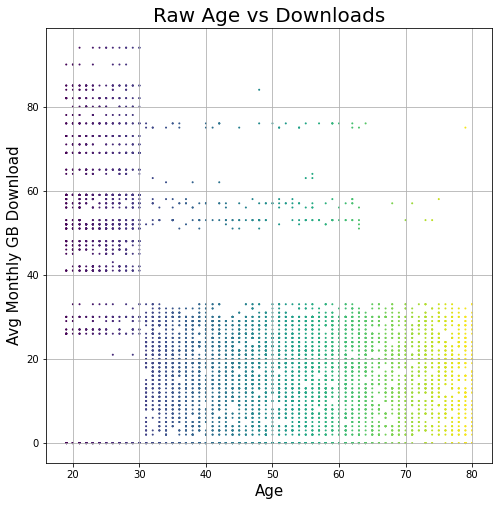

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Avg Monthly GB Download', fontsize = 15)
ax.set_title('Raw Age vs Downloads', fontsize = 20)
Color = M_df['Age']

ax.scatter( df['Age'],df['Avg Monthly GB Download']
                              , s = 1
                              , c= Color )

ax.grid()


In [61]:
centroids = df.sample(3, random_state = 1).reset_index(drop = True)


In [62]:
c1 = centroids.iloc[0, :2].values
c2 = centroids.iloc[1, :2].values
c3 = centroids.iloc[2, :2].values
#c4 = centroids.iloc[3, :3].values
c1

array([61.,  6.])

In [63]:
d1 = np.linalg.norm(df.iloc[:, :2] - c1, axis = 1)*2
d2 = np.linalg.norm(df.iloc[:, :2] - c2, axis = 1)*2
d3 = np.linalg.norm(df.iloc[:, :2] - c3, axis = 1)*2
#d4 = np.linalg.norm(principalDf.iloc[:, :2] - c3, axis = 1)*2

In [64]:
dist_df = pd.DataFrame(np.array([d1, d2, d3]).T, columns = ['d1', 'd2', 'd3'])
dist_df

,d1,d2,d3
0,34.525353,115.412304,76.105190
1,36.769553,112.605506,72.111026
2,103.942292,151.644321,117.660529
3,36.769553,116.927328,76.941536
4,42.047592,121.753850,81.584312
...,...,...,...
7038,63.150614,18.000000,24.413111
7039,58.412327,58.821765,34.234486
7040,122.800651,119.364986,105.905618
7041,62.032250,40.496913,25.612497


In [65]:
np.argmin(dist_df.values, axis = 1) #finding smallest variance
df['cluster label'] = np.argmin(dist_df.values, axis = 1) #create new column of labels
old_centers =pd.DataFrame(np.array([c1, c2, c3]), columns=['Age', 'Avg Monthly GB Download'])
old_centers

,Age,Avg Monthly GB Download
0,61.0,6.0
1,21.0,0.0
2,40.0,7.0


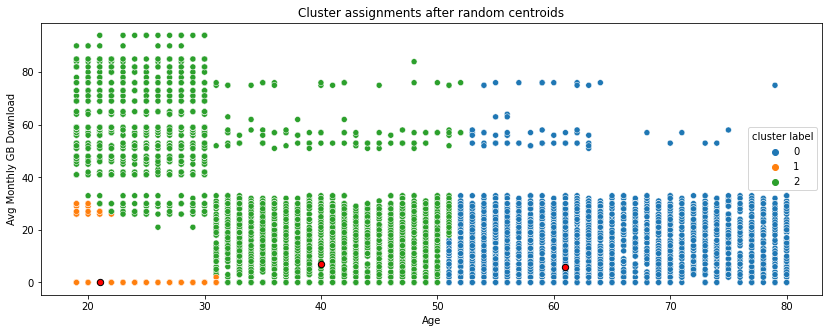

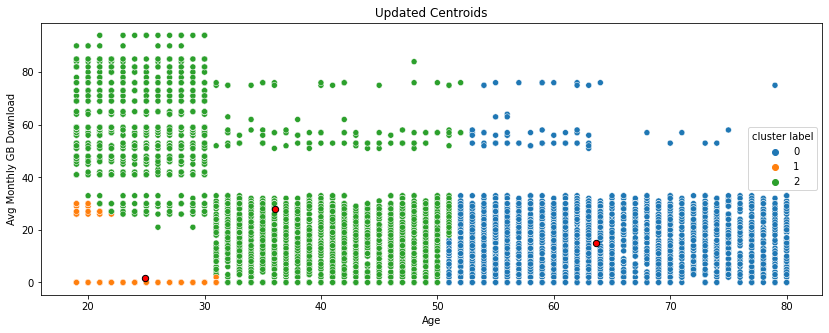

In [66]:

X=df['Age']
Y=df['Avg Monthly GB Download']
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df, x = X,y = Y, hue = 'cluster label', palette='tab10')
plt.title('Cluster assignments after random centroids');
plt.scatter(old_centers['Age'], old_centers['Avg Monthly GB Download'], marker = 'o', s = 40, c = 'red', edgecolor = 'black')

new_centers = df.groupby('cluster label').mean()
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df, x = X,y = Y, hue = 'cluster label', palette='tab10', )
plt.title('Updated Centroids');
plt.scatter(new_centers['Age'], new_centers['Avg Monthly GB Download'], marker = 'o', s = 40, c = 'red', edgecolor = 'black')

In [67]:
# kmeans
km = KMeans(n_clusters = 3)
km



KMeans(n_clusters=3)

In [68]:
predicted = km.fit_predict(df[['Age', 'Avg Monthly GB Download']])
predicted

array([2, 2, 2, ..., 1, 0, 0])

In [69]:
df['cluster'] = predicted
df.head()

,Age,Avg Monthly GB Download,Monthly Charge,Service type,cluster label,cluster
Customer ID,,,,,,
8779-QRDMV,78,9,41.236,5.0,0,2
7495-OOKFY,74,19,83.876,3.0,0,2
1658-BYGOY,71,57,99.268,5.0,0,2
4598-XLKNJ,78,13,102.440,5.0,0,2
4846-WHAFZ,80,15,79.560,3.0,0,2


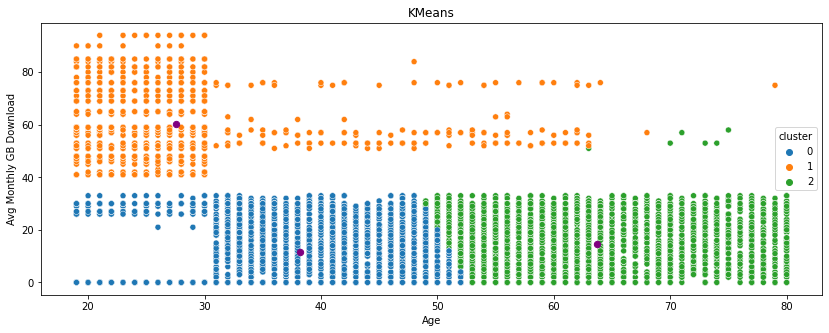

In [70]:
X=df['Age']
Y=df['Avg Monthly GB Download']
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df, x = X,y = Y, hue = 'cluster', palette='tab10')
plt.title('KMeans');
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='o', s = 40,label='centroid')
#plt.scatter(old_centers['Age'], old_centers['Avg Monthly GB Download'], marker = 'o', s = 40, c = 'red', edgecolor = 'black', label='centroid')


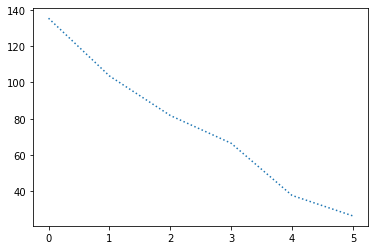

array([[-0.50476441, -0.44781135],
       [-1.17361172,  1.87831859],
       [ 1.01777733, -0.30192061]])

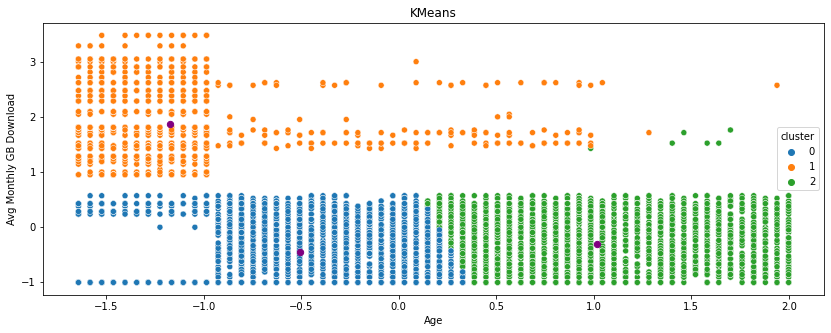

In [71]:
mu = df.mean()
sigma = df.std()
norm = (df-mu)/sigma
U,Sigma,Vt = svd(norm, full_matrices=False)

plt.plot(Sigma, linestyle = 'dotted')
plt.show()

km = KMeans(n_clusters = 3)
predicted = km.fit_predict(norm[['Age', 'Avg Monthly GB Download']])
norm['cluster'] = predicted
df_c1=df[df.cluster==0]
df_c2=df[df.cluster==1]
df_c3=df[df.cluster==2]

#plt.scatter(df_c1.Age,df_c1['Avg Monthly GB Download'], color='green', label='Avg Monthly GB Download')
#plt.scatter(df_c2.Age,df_c2['Avg Monthly GB Download'], color='red',label='Avg Monthly GB Download')
#plt.scatter(df_c3.Age,df_c3['Avg Monthly GB Download'], color='yellow',label='Avg Monthly GB Download')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
#plt.xlabel('Age')
#plt.ylabel('Avg Monthly GB Download')
#plt.legend()

X=norm['Age']
Y=norm['Avg Monthly GB Download']
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df, x = X,y = Y, hue = 'cluster', palette='tab10')
plt.title('KMeans');
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='o', s = 40,label='centroid')
km.cluster_centers_